In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
credit_card_data = pd.read_csv('creditcard.csv')

In [3]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [8]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [9]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
legit_sample = legit.sample(n=492)

In [13]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [14]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
99678,67231.0,1.495189,-1.058816,0.651656,-1.306978,-1.738515,-0.874933,-1.128001,-0.190571,-1.683596,...,-0.008804,0.390562,-0.062749,0.405018,0.451672,-0.032403,0.042771,0.024310,19.54,0
4570,3896.0,-0.727033,0.085560,2.415084,1.245556,-0.229985,2.412870,-0.684874,0.753039,2.120305,...,0.305117,1.517745,0.153995,-1.005432,-1.077441,-0.161578,0.217884,0.208130,80.14,0
273928,165770.0,-1.683237,1.220767,0.235650,-1.383543,0.093038,0.372949,-0.400561,1.114555,0.198083,...,-0.179187,-0.473349,0.035752,-1.471199,0.017615,-0.181588,0.132659,0.073724,0.77,0
59479,48860.0,-2.359199,2.929704,-0.319904,2.370656,-0.740401,0.562156,-1.013950,1.992261,-1.723994,...,-0.142002,-0.698597,0.075905,-0.883296,-0.041489,0.036796,0.192836,0.103976,5.52,0
70885,54061.0,-0.939896,0.305058,2.073620,-0.347583,0.877086,-1.012083,0.662369,-0.210002,-0.455065,...,-0.119713,-0.373031,0.055533,0.396071,-0.261661,-0.080748,-0.125523,-0.105326,4.49,0


In [16]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [17]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [18]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95350.371951,0.034861,0.120153,0.004621,0.012349,0.022127,0.070151,0.038761,0.053107,0.064696,...,0.003669,-0.008715,-0.050725,-0.001245,-0.029609,-0.020844,-0.032029,0.014460,0.004684,83.437866
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [19]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [20]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
99678    67231.0  1.495189 -1.058816  0.651656 -1.306978 -1.738515 -0.874933   
4570      3896.0 -0.727033  0.085560  2.415084  1.245556 -0.229985  2.412870   
273928  165770.0 -1.683237  1.220767  0.235650 -1.383543  0.093038  0.372949   
59479    48860.0 -2.359199  2.929704 -0.319904  2.370656 -0.740401  0.562156   
70885    54061.0 -0.939896  0.305058  2.073620 -0.347583  0.877086 -1.012083   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [21]:
print(Y)

99678     0
4570      0
273928    0
59479     0
70885     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into Training data & Testing Data

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [24]:
print(Y.shape, Y_train.shape, Y_test.shape)

(984,) (787,) (197,)


Model Training

Logistic Regression

In [25]:
model = LogisticRegression()

In [26]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

# Model Evaluation #


Accuracy Score

In [27]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [28]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9504447268106735


In [29]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [30]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.934010152284264


AUC : 0.9826839826839827


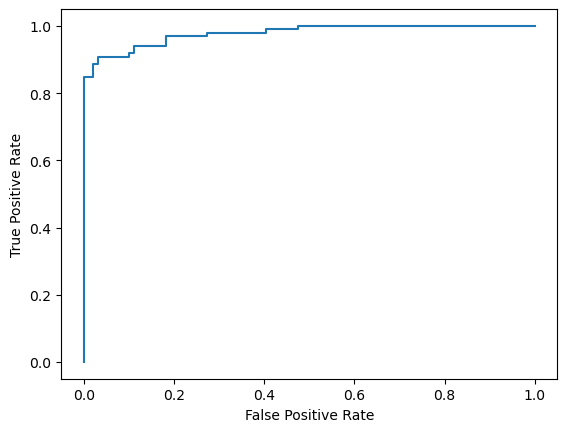

In [48]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
print("AUC :", roc_auc_score(y_true=Y_test, y_score=y_prob))
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [31]:
def predire(model, new_data):
    prediction=model.predict(new_data)
    return prediction

In [32]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100)
forest.fit(X_train, Y_train)
y_pred = forest.predict(X_test)
y_prob = forest.predict_proba(X_test)[:, 1]

In [33]:
print(y_prob)

[1.   0.04 0.03 0.02 1.   0.18 0.91 1.   0.07 1.   0.02 1.   1.   0.23
 0.07 1.   0.02 0.78 0.   0.   0.   0.06 0.1  1.   0.18 1.   1.   0.26
 0.99 0.2  0.5  1.   0.23 0.96 1.   0.03 0.03 0.34 0.13 1.   0.98 0.12
 0.1  1.   1.   1.   1.   1.   0.15 0.05 0.18 0.04 0.07 0.03 0.12 0.24
 0.36 1.   0.09 0.02 1.   1.   1.   0.92 1.   0.08 1.   0.06 0.23 0.98
 0.05 0.09 0.22 0.12 1.   0.6  0.14 1.   1.   1.   0.38 0.87 1.   1.
 0.03 0.1  0.03 0.03 0.04 0.53 0.03 0.94 1.   1.   1.   1.   0.89 0.99
 0.01 0.97 1.   1.   1.   0.02 1.   0.03 0.44 0.22 0.18 0.11 0.04 0.05
 0.   0.08 0.25 1.   1.   0.15 0.01 0.11 0.06 0.02 0.23 0.05 0.84 0.29
 0.02 1.   0.61 1.   0.9  0.1  0.01 1.   0.11 1.   0.05 0.98 0.01 0.99
 0.19 0.09 1.   1.   0.29 0.01 1.   0.03 1.   0.38 0.03 0.2  1.   1.
 0.11 0.06 1.   1.   0.1  0.11 0.07 0.99 0.01 0.95 1.   0.06 0.04 1.
 0.08 1.   0.97 0.08 1.   1.   0.01 0.26 0.03 0.19 0.4  0.54 0.21 1.
 0.1  0.04 1.   0.07 0.06 0.14 0.02 0.02 0.95 1.   0.38 1.   0.99 1.
 0.04]


In [34]:
print(y_pred)

[1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0
 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0
 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1
 0 0 0 0 0 1 1 0 1 1 1 0]


In [36]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score

In [39]:
print("bAcc: %.2f, AUC: %.2f " % (
balanced_accuracy_score(y_true=Y_test, y_pred=y_pred),
roc_auc_score(y_true=Y_test, y_score=y_prob)))

bAcc: 0.92, AUC: 0.98 


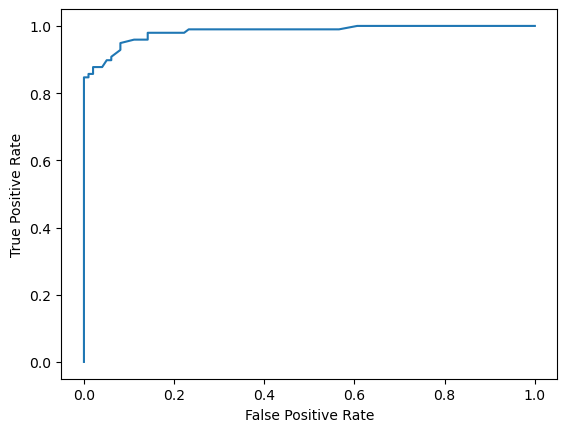

In [45]:
y_pred_proba = forest.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr1,tpr1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [52]:
import xgboost as xgb
model1 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model1.fit(X_train, Y_train)
Y_pred=model1.predict(X_test)
Y_prob = model1.predict_proba(X_test)[:, 1]

In [53]:
print("bAcc: %.2f, AUC: %.2f " % (
balanced_accuracy_score(y_true=Y_test, y_pred=Y_pred),
roc_auc_score(y_true=Y_test, y_score=Y_prob)))

bAcc: 0.93, AUC: 0.98 


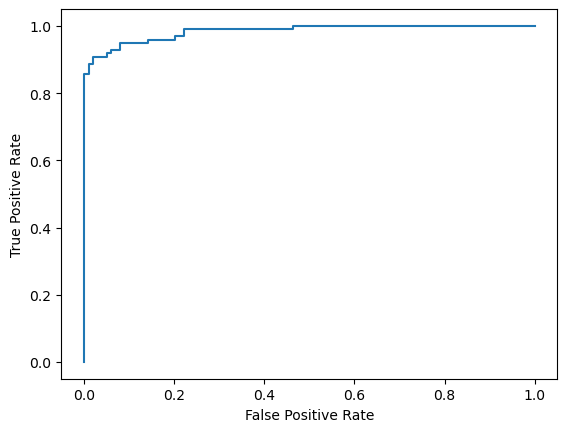

In [54]:
Y_pred_proba = model1.predict_proba(X_test)[::,1]
fpr12, tpr12, _ = metrics.roc_curve(Y_test,  Y_pred_proba)

#create ROC curve
plt.plot(fpr12,tpr12)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [82]:
from sklearn import svm


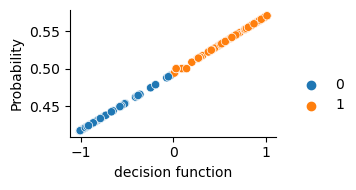

In [83]:
svmlin = svm.SVC(kernel='rbf', probability=True).fit(X_train, Y_train)
y_pred11 = svmlin.predict(X_test)
y_score = svmlin.decision_function(X_test)
y_prob1 = svmlin.predict_proba(X_test)[:, 1]
ax = sns.relplot(x=y_score, y=y_prob1, hue=y_pred11, height=2, aspect=1.5)
_ = ax.set_axis_labels("decision function", "Probability").tight_layout()


In [77]:
print("bAcc: %.2f, AUC: %.2f (AUC with proba: %.2f)" % (
metrics.balanced_accuracy_score(y_true=Y_test, y_pred=y_pred11),
metrics.roc_auc_score(y_true=Y_test, y_score=y_score),
metrics.roc_auc_score(y_true=Y_test, y_score=y_prob1)))


bAcc: 0.57, AUC: 0.59 (AUC with proba: 0.59)
